In [1]:
import numpy as np
import pandas as pd

In [2]:
iris=pd.read_csv("C:\\ksr\\data science\\DS_batch1\\datasets\\Iris.csv")

In [3]:
iris.shape

(150, 5)

In [4]:
iris.head()

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-setosa
2            4.7           3.2            1.3           0.2  Iris-setosa
3            4.6           3.1            1.5           0.2  Iris-setosa
4            5.0           3.6            1.4           0.2  Iris-setosa

In [5]:
iris1=iris.drop(["Species"],1)

In [6]:
from sklearn.preprocessing import MinMaxScaler
mn=MinMaxScaler()
iris2=pd.DataFrame(mn.fit_transform(iris1),columns=iris1.columns)

In [7]:
iris2.head()

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0       0.222222      0.625000       0.067797      0.041667
1       0.166667      0.416667       0.067797      0.041667
2       0.111111      0.500000       0.050847      0.041667
3       0.083333      0.458333       0.084746      0.041667
4       0.194444      0.666667       0.067797      0.041667

In [26]:
from sklearn.cluster import KMeans
kn=KMeans(n_clusters=3)
kn.fit(iris2)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [27]:
kn.inertia_

6.998114004826761

In [28]:
kn.cluster_centers_

array([[0.19611111, 0.59083333, 0.07864407, 0.06      ],
       [0.44125683, 0.30737705, 0.57571548, 0.54918033],
       [0.70726496, 0.4508547 , 0.79704476, 0.82478632]])

In [29]:
kn.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [30]:
iris["lables"]=kn.labels_

In [32]:
iris["lables"].value_counts()

1    61
0    50
2    39
Name: lables, dtype: int64

In [35]:
sse={}
for i in range(2,20):
    kn1=KMeans(n_clusters=i)
    kn1.fit(iris2)
    sse[i]=kn1.inertia_
    print("number of clusters are",i,sse[i])

number of clusters are 2 12.14368828157972
number of clusters are 3 6.998114004826761
number of clusters are 4 5.532831003081898
number of clusters are 5 4.571180508755745
number of clusters are 6 3.9158006119711084
number of clusters are 7 3.467545970344209
number of clusters are 8 3.1564851711385624
number of clusters are 9 2.8159339131017536
number of clusters are 10 2.5545977046457256
number of clusters are 11 2.269379559653298
number of clusters are 12 2.1869819684982135
number of clusters are 13 2.059490420495634
number of clusters are 14 1.9504082145661639
number of clusters are 15 1.8229409515347417
number of clusters are 16 1.6854936878446365
number of clusters are 17 1.6191857353364016
number of clusters are 18 1.5364028623311405
number of clusters are 19 1.4464857350364864


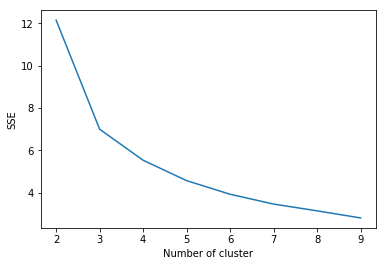

In [37]:
import matplotlib.pyplot as plt
sse = {}
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(iris2)
    iris["clusters"] = kmeans.labels_
    #print(data["clusters"])
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()